In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [37]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, n_features=2, centers=3)

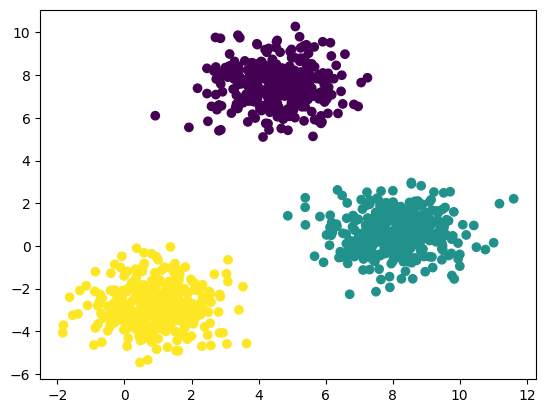

In [38]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [60]:
from sklearn.cluster import KMeans
X_test_scaled

array([[ 5.25940864e-01,  1.28534945e+00],
       [-9.21938488e-01, -1.12685419e+00],
       [ 4.45016480e-01,  1.38998889e+00],
       [ 1.35632686e+00, -3.31879598e-01],
       [-8.41813340e-01, -8.43649519e-01],
       [-1.01244306e+00, -9.42634616e-01],
       [ 1.50293719e+00, -1.42644563e-02],
       [-9.94804425e-01, -8.54052220e-01],
       [ 1.44119322e+00, -6.64691245e-01],
       [ 1.06298053e+00, -1.16569787e-01],
       [ 1.06337297e+00, -4.71842436e-01],
       [ 9.94662976e-01,  9.54978606e-02],
       [-1.05063448e+00, -1.26927315e+00],
       [-6.91447433e-03,  1.56848471e+00],
       [-4.29811231e-01,  1.39184700e+00],
       [ 1.49408211e+00, -1.74584786e-01],
       [-8.91404446e-02,  1.40876934e+00],
       [ 4.63040742e-02,  1.06697258e+00],
       [ 1.09171756e-01,  1.23544829e+00],
       [ 1.11890666e+00, -5.78995301e-01],
       [ 1.08130746e-01,  1.39201150e+00],
       [ 5.38827448e-01, -1.95955956e-01],
       [ 1.88005958e-01,  1.31074984e+00],
       [-1.

In [61]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

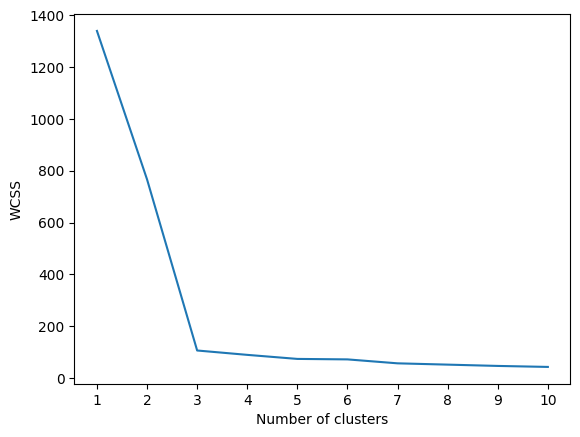

In [62]:
plt.plot(range(1,11),wcss)
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [64]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [65]:
y_pred = kmeans.predict(X_test_scaled)

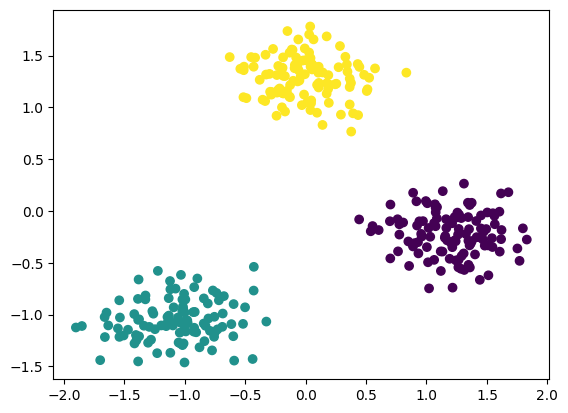

In [67]:
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_pred, cmap='viridis')

In [68]:
from kneed import KneeLocator

In [69]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

In [71]:
kl.elbow

np.int64(3)

In [72]:
from sklearn.metrics import silhouette_score
silhoutee_coeff = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    silhoutee_coeff.append(silhouette_score(X_train_scaled, kmeans.labels_))
    

In [73]:
silhoutee_coeff

[np.float64(0.6118376640131769),
 np.float64(0.7605899154828372),
 np.float64(0.6344142924457977),
 np.float64(0.48425445237264936),
 np.float64(0.6013853863920726),
 np.float64(0.35970145582026447),
 np.float64(0.339765780109881),
 np.float64(0.34232633966337145),
 np.float64(0.3444745314092469)]

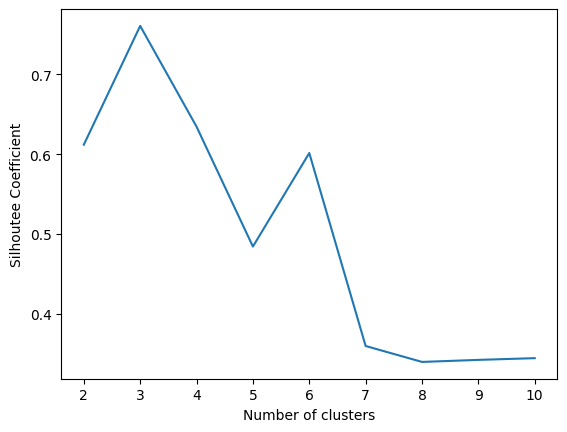

In [74]:
plt.plot(range(2,11),silhoutee_coeff)
plt.xticks(np.arange(2,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutee Coefficient')
plt.show()
